# Paso 1 - Data Preparation

# Importar bibliotecas

In [1233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import statistics
%matplotlib inline

# Importar e visualizar dados

Começamos por importar o dataset que pretendemos analisar, a partir do ficheiro com os dados de treino.
Transformamos os valores da coluna 'Work load Average/day' em valores numéricos de modo a podermos trabalhar com eles.
Visualizamos as primeiras linhas do dataset.

In [1234]:
train = pd.read_csv('problem_info/train_data.csv')
test = pd.read_csv('problem_info/test_data.csv')
train['Work load Average/day '] = pd.to_numeric(train['Work load Average/day '].str.replace(',', ''))


train.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,1,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,2,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,4,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,5,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
5,6,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
6,7,22,7,6,1,361,52,3,28,239554,...,0,1,1,1,0,4,80,172,27,1
7,8,23,7,6,1,260,50,11,36,239554,...,0,1,4,1,0,0,65,168,23,1
8,9,19,7,2,1,155,12,14,34,239554,...,0,1,2,1,0,0,95,196,25,1
9,10,22,7,2,1,235,11,14,37,239554,...,0,3,1,0,0,1,88,172,29,1


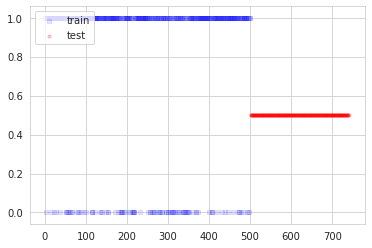

In [1235]:
x = range(250)
y = range(250,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train['ID'] , train['Absent'], s=10, c='b', marker="s", label='train', alpha=0.1)
ax1.scatter(test['ID'], test['ID'].apply(lambda x: 0.5), s=10, c='r', marker="o", label='test', alpha=0.2)
plt.legend(loc='upper left');
plt.show()

No gráfico acima podemos ver que no dataset que os trabalhadores representados nos datasets de treino e de testes são diferentes (nem uma única sobreposição). Isto diz-nos algo importante sobre o problema que temos em mãos:

#### Ao treinar um modelo de previsão, estaremos a tentar prever se um *novo* trabalhador estará ausente ou não 


De seguida analisamos a possibilidade do dataset conter valore nulos.

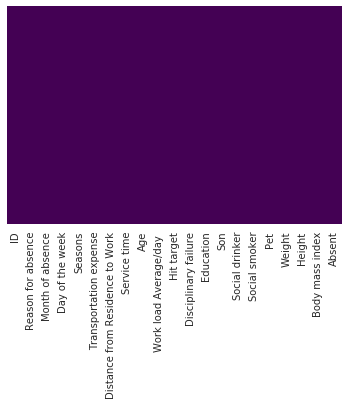

In [1189]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Felizmente o dataset não contém valores nulos, por isso não precisamos de lidar com esse problema (através da remoção de linhas ou colunas), ou mesmo da inserção de valores fictícios.

# Análise e Visualização da distribuição de valores das diferentes features

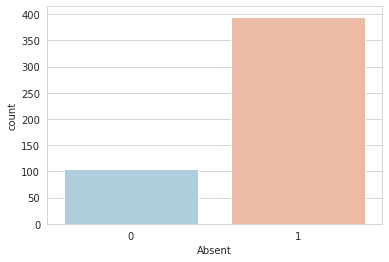

In [1190]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',data=train,palette='RdBu_r')


Antes de mais, verificamos que a distribuição dos valores da feature que pretendemos futuramente prever é bastante desequilibrada, pelo que futuramente deveremos tomar precauções para que isto não afete negativamente o processo de aprendizagem e consequentemente a eficácia dos modelos desenvolvidos.

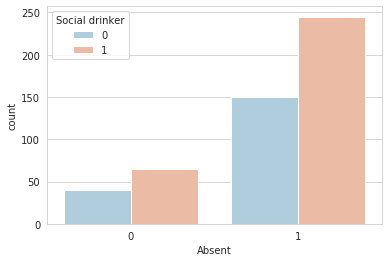

In [1191]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Social drinker',data=train,palette='RdBu_r')



A partir deste gráfico, podemos concluir que o facto de um funcionário beber socialmente não afeta fortemente a probabilidade deste vir a estar ausente.

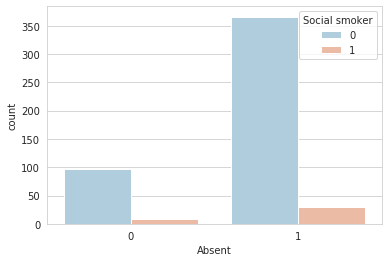

In [1192]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Social smoker',data=train,palette='RdBu_r')

A partir deste gráfico, podemos concluir que o facto de um funcionário ser fumador não afeta fortemente a probabilidade deste vir a estar ausente.

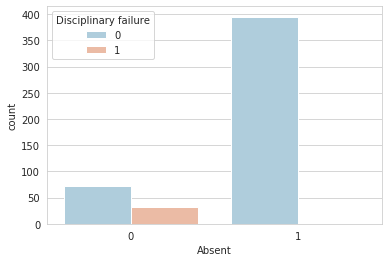

In [1193]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Disciplinary failure',data=train,palette='RdBu_r')

Neste dataset, não há um único caso de ausência em que o funcionário em questão tenha tido uma falta disciplinar anteriormente. Isto sugere que os funcionários que têm faltas disciplinares ficam bastante menos propensos a estar ausentes. Esta feature tem, portanto, um peso significativo no problema em questão.

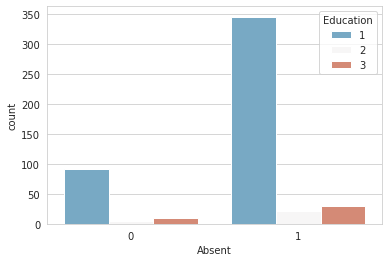

In [1194]:
#train["Education"] = train["Education"].apply(lambda x: 0 if x == 1 else 1)
#test["Education"] = test["Education"].apply(lambda x: 0 if x == 1 else 1)
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Education',data=train,palette='RdBu_r')

O grau de educação não parece variar significativamente conforme os casos de ausência ou não.

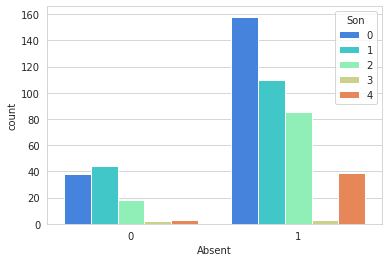

In [1195]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Son',data=train,palette='rainbow')

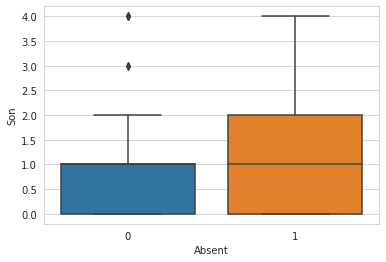

In [1196]:
sns.set_style('whitegrid')
sns.boxplot(x='Absent', y='Son', data=train)

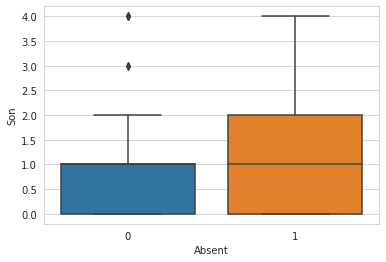

In [1197]:
sns.set_style('whitegrid')
sns.boxplot(x='Absent', y='Son', data=train)

A distribuição do número de filhos dos trabalhadores varia significativamente entre os casos de ausência e não-ausência, pelo que o número de filhos pode ser também um fator relevante nas nossas previsões. 

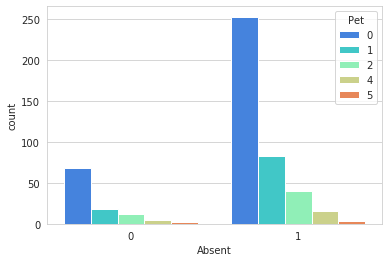

In [1198]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Pet',data=train,palette='rainbow')

Contrariamente ao gráfico anterior, aqui a distribuição dos valores não varia significativamente, pelo que provavelmente a coluna 'Pet' do dataset poderá ser desconsiderada no desenvolvimento dos modelos de previsão.

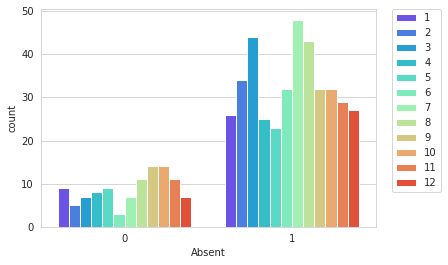

In [1199]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Month of absence',data=train,palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

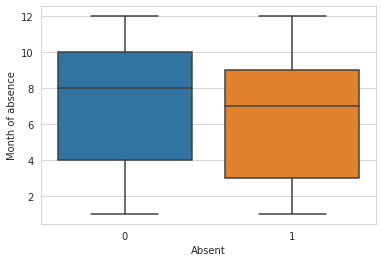

In [1200]:
sns.set_style('whitegrid')
sns.boxplot(x='Absent', y='Month of absence', data=train)

Os meses mais frequentes nas observações de ausências seguem um padrão diferente do que os mais frequentes nas observações de não-ausências, no entanto como podemos ver no gráfico abaixo essas dierenças não se refletem fortemente na média dos valores, por exemplo.

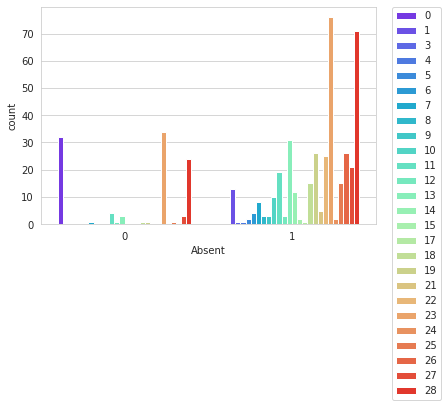

In [1201]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Reason for absence',data=train,palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



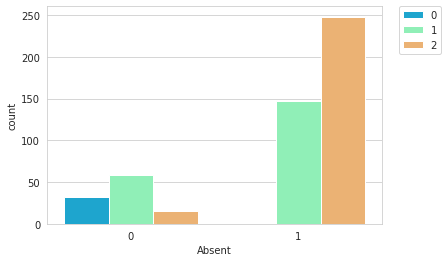

In [1202]:
train["Reason for absence"] = train["Reason for absence"].apply(lambda x: 0 if x == 0 else 1 if x in [0,28,23] else 2)
test["Reason for absence"] = test["Reason for absence"].apply(lambda x: 0 if x == 0 else 1 if x in [0,28,23] else 2)
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Reason for absence',data=train,palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Como seria expectável, as razões de anteriores ausências variam bastante entre os casos de ausência e os de não-ausência, e podemos verificar que é provável que um trabalhador que nunca faltou ao trabalho provavelmente não estará ausente. Por outro lado, há determinados valores desta feature a que todos os trabalhadores estão sujeitos (a maior parte das pessoas eventualmente fica doente, e esses valores (28 e 23) correspondem provavelmente a doenças comuns). Assim, se mapearmos os valroes desta feature em 3 classes (cossespondendo aos valores 0 - sem razão (não faltou), 1 - razões muito universalmente comuns, 2 - outras razões) conseguimos vizualizar uma distribuição de valores muito mais interessante, que certamente será uma das features com maior peso na previsão das ausências.

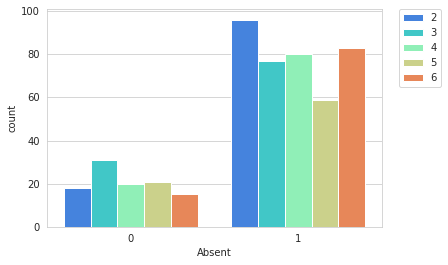

In [1203]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Day of the week',data=train,palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

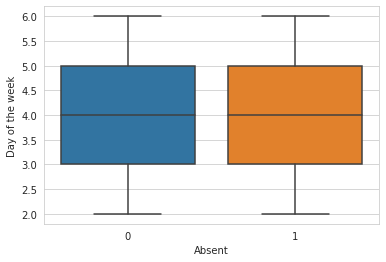

In [1204]:
sns.set_style('whitegrid')
sns.boxplot(x='Absent', y='Day of the week', data=train)

A distribuição das presenças/ausências pelos dias da semana também parece variar significativamente. No entanto, esta diferença não se reflete em medidas como a mediana, por exemplo, como verificamos no diagrama acima.

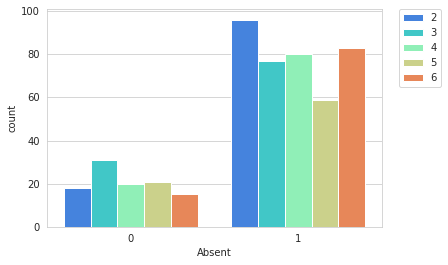

In [1205]:
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Day of the week',data=train,palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Esta feature comporta-se semelhantemente à anterior.

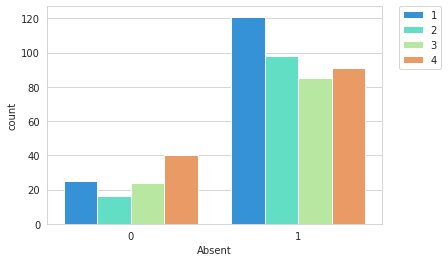

In [1206]:
#train["Seasons"] = train["Seasons"].apply(lambda x: 0 if x in [1,2] else 1)
#test["Seasons"] = test["Seasons"].apply(lambda x: 0 if x in [1,2] else 1)
sns.set_style('whitegrid')
sns.countplot(x='Absent',hue='Seasons',data=train,palette='rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

A distribuição desta variável parece inverter-se, pelo que poderá ter uma correlação com as ausências.

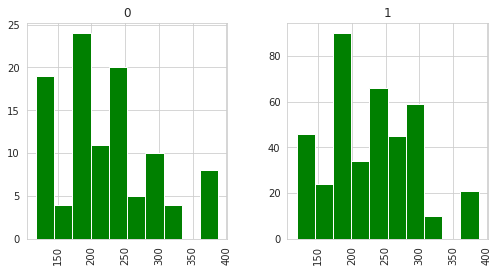

In [1207]:
train['Transportation expense'].hist(train['Absent'], color='green',bins=10,figsize=(8,4))
sns.set_style('whitegrid')

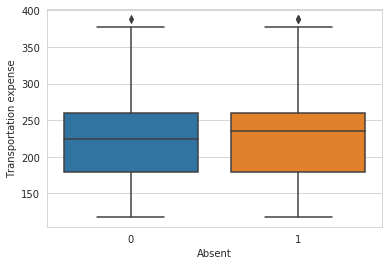

In [1208]:
sns.boxplot(x='Absent', y='Transportation expense', data=train)

A distribuição dos valores desta feature parece não variar significativamente. Como os valores desta coluna são constínuos, para além de uma eventual normalização não faremos qualquer tipo de tratamento por agora.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09c0590fd0>,
      dtype=object)

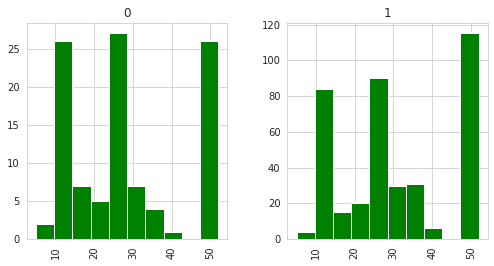

In [1209]:
train['Distance from Residence to Work'].hist(train['Absent'], color='green',bins=10,figsize=(8,4))

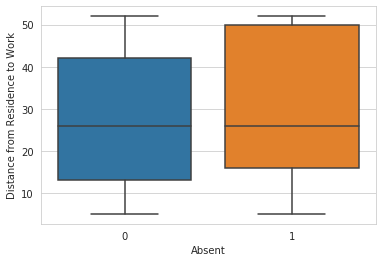

In [1210]:
sns.boxplot(x='Absent', y='Distance from Residence to Work', data=train)

Aqui a tendência da feature anterior mantém-se. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09c03ff090>,
      dtype=object)

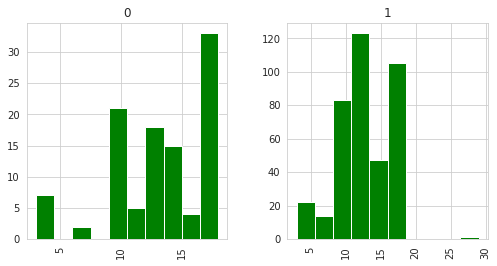

In [1211]:
#train["Service time"] = pd.qcut(train["Service time"], q=2).apply(lambda x: x.left)
train['Service time'].hist(train['Absent'], color='green',bins=10, figsize=(8,4))

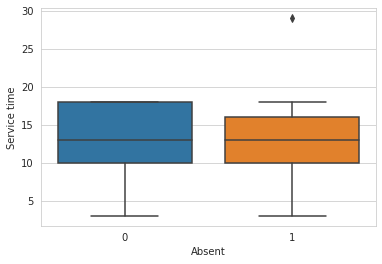

In [1212]:
sns.boxplot(x='Absent', y='Service time', data=train)
mean = train.loc[train["Service time"] < 25, 'Service time'].mean()
train["Service time"] = np.where(train["Service time"] >25, mean,train['Service time'])

Verificamos um outlier no diagrama acima, e como este pode afetar negativamente a precisão de um eventual modelo de precisão, mudámos o seu valor para a média dessa coluna (imputação pela média).

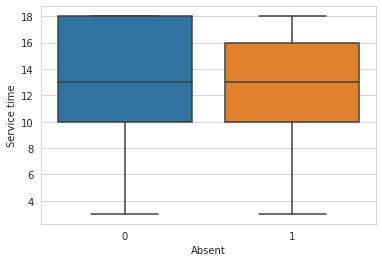

In [1213]:
sns.boxplot(x='Absent', y='Service time', data=train)

Podemos observar que há uma tendência para os trabalhadores com mais tmepo de serviço estarem menos propensos a faltar.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09c025de10>,
      dtype=object)

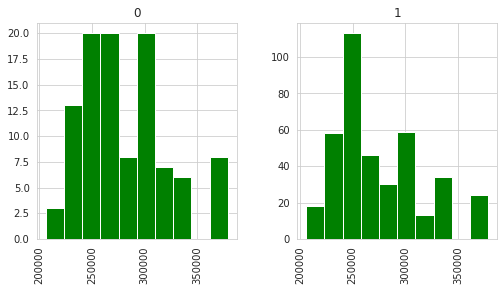

In [1214]:
#train["Work load Average/day "] = pd.qcut(train["Work load Average/day "], q=2).apply(lambda x: x.left)
train['Work load Average/day '].hist(train['Absent'], color='green',bins=10,figsize=(8,4))

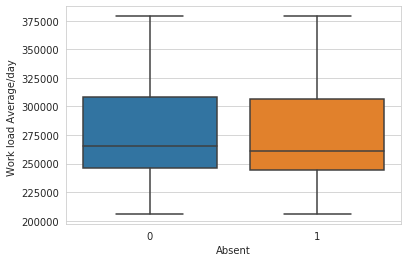

In [1215]:
sns.boxplot(x='Absent', y='Work load Average/day ', data=train)

A distribuição desta featue não parece variar significativamente.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09c00d67d0>,
      dtype=object)

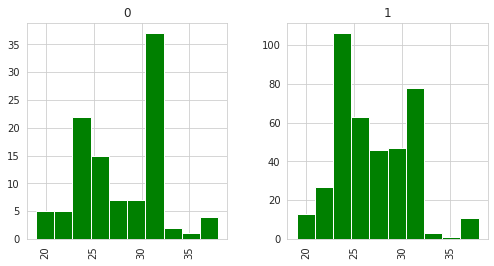

In [1216]:
#train["Body mass index"] = train["Body mass index"].apply(lambda x: 0 if x < 28 else 1)
train['Body mass index'].hist(train['Absent'], color='green', bins=10, figsize=(8,4))

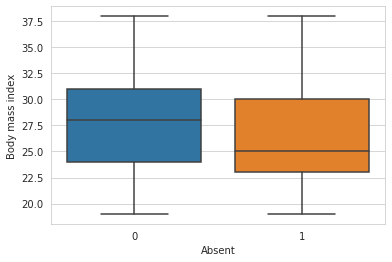

In [1217]:
sns.boxplot(x='Absent', y='Body mass index', data=train)

Esta feature também não parece ter grande correlação com a ausência, no entanto verificamos definitivamente um desvio na mediana das obvervações com ausência e não ausência, pelo que não excluiremos esta coluna.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09bff4e190>,
      dtype=object)

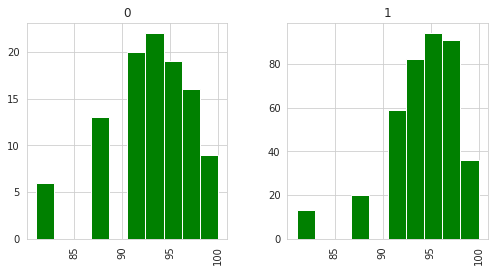

In [1218]:
#train["Hit target"] = train["Hit target"].apply(lambda x: 0 if x < 91 else 1)
train['Hit target'].hist(train['Absent'], color='green',bins=10,figsize=(8,4))

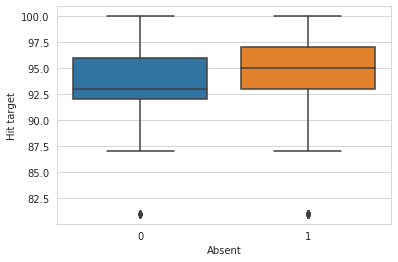

In [1219]:
sns.boxplot(x='Absent', y='Hit target', data=train)
mean = train.loc[train["Hit target"] > 83, 'Hit target'].mean()
train["Hit target"] = np.where(train["Hit target"] < 83, mean,train['Hit target'])

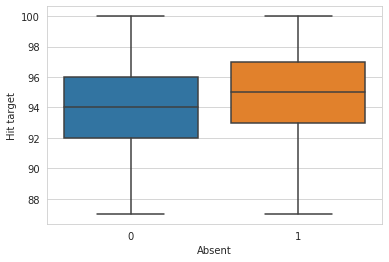

In [1220]:
sns.boxplot(x='Absent', y='Hit target', data=train)

A distribuição dos valores desta feature vai de encontro à hipótese em que pensámos para a workload diária. Mais uma vez, excluimos os outliers que se visualizam no primeiro diagrama de caixa e bigodes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09bfdabf90>,
      dtype=object)

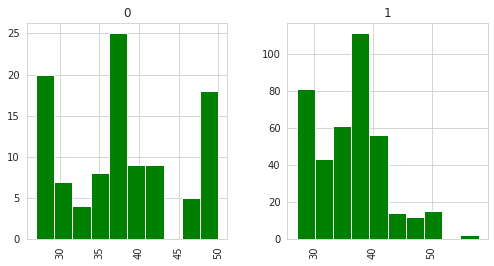

In [1221]:
#train["Age"] = train["Age"].apply(lambda x: 0 if x < 40 else 1)
train['Age'].hist(train['Absent'], color='green', bins=10,figsize=(8,4))

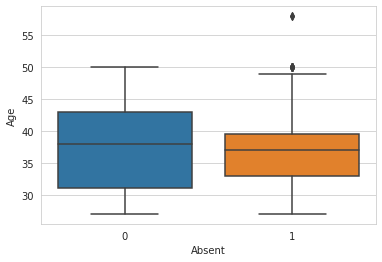

In [1222]:
sns.boxplot(x='Absent', y='Age', data=train)
mean = train.loc[train["Age"] < 55, 'Age'].mean()
train["Age"] = np.where(train["Age"] > 55, mean,train['Age'])

A idade parece ter uma relação com a ausência.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09bfc1bf50>,
      dtype=object)

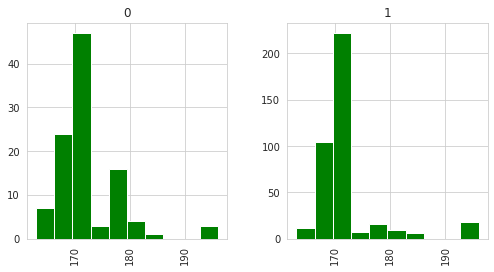

In [1223]:
#train["Height"] = train["Height"].apply(lambda x: 0 if x < 45 else 1)
train['Height'].hist(train['Absent'], color='green', bins=10,figsize=(8,4))

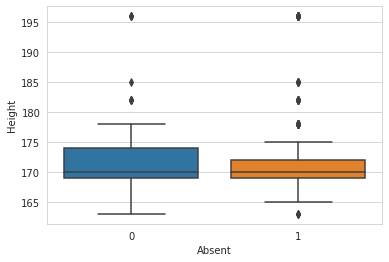

In [1224]:
sns.boxplot(x='Absent', y='Height', data=train)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09bfa76d50>,
      dtype=object)

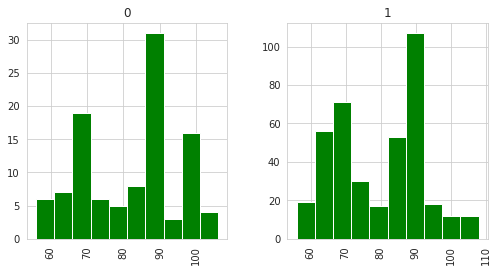

In [1225]:
#train["Weight"] = train["Weight"].apply(lambda x: 0 if x < 85 else 1)
train['Weight'].hist(train['Absent'], color='green', bins=10,figsize=(8,4))

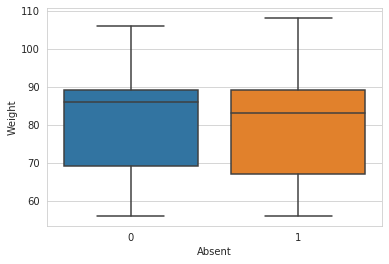

In [1226]:
sns.boxplot(x='Absent', y='Weight', data=train)

### Segundo as observações feitas até agora, podemos com segurança descartar as colunas 'ID', 'Pet', 'Social Drinker'  e 'Social smoker'

In [1227]:
from sklearn import preprocessing

train.drop(['ID', 'Pet', 'Social smoker', 'Social drinker'],axis=1,inplace=True)
test.drop(['ID', 'Pet', 'Social smoker', 'Social drinker'],axis=1,inplace=True)

min_max_scaler = preprocessing.MinMaxScaler()
train = pd.DataFrame(min_max_scaler.fit_transform(train), columns=train.columns, index=train.index)
min_max_scaler = preprocessing.MinMaxScaler()
test = pd.DataFrame(min_max_scaler.fit_transform(test), columns=test.columns, index=test.index)

train.head()


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Weight,Height,Body mass index,Absent
0,1.0,0.545455,0.25,0.0,0.633333,0.659574,0.666667,0.260870,0.194471,0.769231,0.0,0.0,0.50,0.653846,0.272727,0.578947,1.0
1,0.0,0.545455,0.25,0.0,0.000000,0.170213,1.000000,1.000000,0.194471,0.769231,1.0,0.0,0.25,0.807692,0.454545,0.631579,0.0
2,0.5,0.545455,0.50,0.0,0.225926,0.978723,1.000000,0.478261,0.194471,0.769231,0.0,0.0,0.00,0.634615,0.212121,0.631579,1.0
3,1.0,0.545455,0.75,0.0,0.596296,0.000000,0.733333,0.521739,0.194471,0.769231,0.0,0.0,0.50,0.230769,0.151515,0.263158,1.0
4,0.5,0.545455,0.75,0.0,0.633333,0.659574,0.666667,0.260870,0.194471,0.769231,0.0,0.0,0.50,0.653846,0.272727,0.578947,1.0


Por agora faremos uma seleção preliminar das features que (podemos dizer com segurança) não se relacionam significativamente com a ausência de um trabalhador.

Efetuamos também uma normalização do dataset de maneira que os valores dasfeatures se encontrem todos distribuídos no mesmo intervalo.

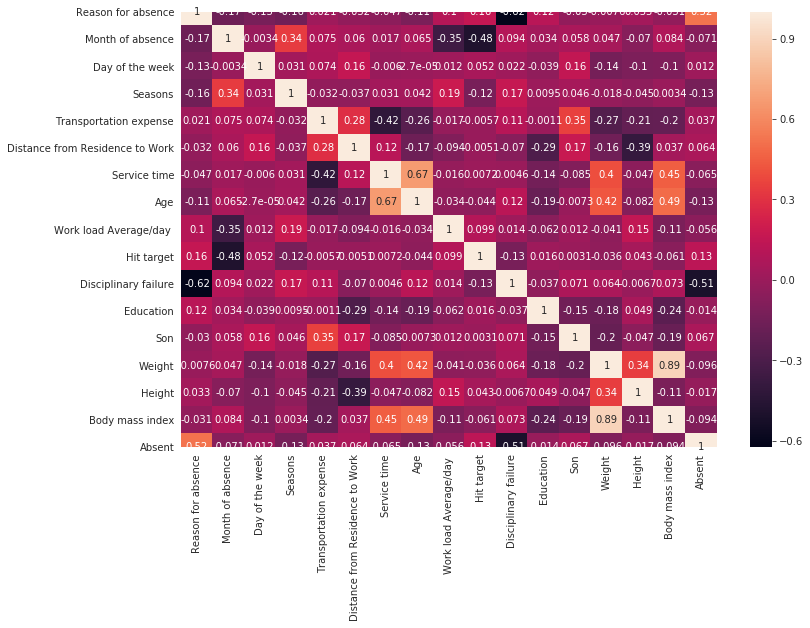

In [1228]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)

Pesos atuais (lineares) das deatures do dataset.

In [1229]:
train.to_csv('prep_train.csv', index=False)
test.to_csv('prep_test.csv', index=False)

# Validar a preparação dos dados

Apenas no sentido de validar a rpeparação que fizemos dos dados, vamos tentar utilizá-los num modelo de previsão de regressão logística.

In [1230]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train = pd.read_csv('prep_train.csv')

X_test = pd.read_csv('prep_test.csv')
y_test = pd.read_csv('problem_info/sample_submission.csv').drop('ID', axis=1)

train = pd.read_csv('prep_train.csv')
X_train = train.drop('Absent', axis=1)
y_train = train['Absent']

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.33      0.09      0.14        44
           1       0.82      0.96      0.89       196

    accuracy                           0.80       240
   macro avg       0.58      0.53      0.51       240
weighted avg       0.73      0.80      0.75       240

[[  4  40]
 [  8 188]]
0.8


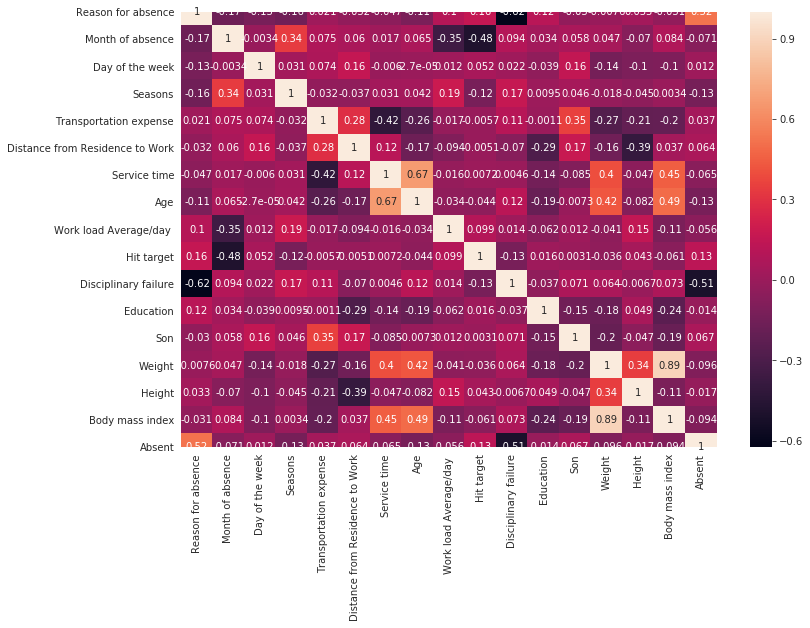

In [1231]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)